# Домашнее задание №1: линейная регрессия и векторное дифференцирование (10 баллов).

* Некоторые задания будут по вариантам (всего 4 варианта). Чтобы выяснить свой вариант, посчитайте количество букв в своей фамилии, возьмите остаток от деления на 4 и прибавьте 1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Многомерная линейная регрессия из sklearn

Применим многомерную регрессию из sklearn для стандартного датасета

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 10000)

У нас 10000 объектов и 100 признаков. Для начала решим задачу аналитически "из коробки".

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X, y)
print(mean_squared_error(y, reg.predict(X)))
reg.coef_

9.239158294893208e-26


array([ 3.80963918e-14,  2.93098879e-14, -7.10542736e-15, -8.88178420e-15,
        7.33637314e+01, -3.55271368e-15, -2.48689958e-14, -2.48689958e-14,
        1.15463195e-14, -3.64153152e-14,  9.76996262e-15,  3.55271368e-15,
        5.82163461e+01,  4.97379915e-14,  2.24457621e+00,  7.10542736e-15,
       -1.42108547e-14,  2.57571742e-14,  1.77635684e-14, -3.90798505e-14,
       -2.13162821e-14,  0.00000000e+00,  4.70734562e-14,  2.02309522e+01,
        2.13162821e-14,  3.24185123e-14, -4.88498131e-15,  6.11837548e+01,
        6.75015599e-14,  7.10542736e-15, -2.22044605e-14, -5.32907052e-14,
        2.48689958e-14,  5.99520433e-14, -3.55271368e-14, -1.24344979e-14,
        3.26579729e+01,  7.57172103e-14, -1.06581410e-14,  6.03961325e-14,
       -2.39808173e-14, -1.06581410e-14,  1.68753900e-14,  5.77315973e-14,
       -3.55271368e-15,  4.97379915e-14, -4.44089210e-14, -3.73034936e-14,
       -4.13002965e-14, -3.55271368e-15, -3.90798505e-14,  0.00000000e+00,
       -4.08562073e-14,  

Теперь попробуем обучить линейную регрессию методом градиентного спуска "из коробки"

In [ ]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(alpha = 1e-18, loss = 'squared_loss', max_iter = 40000).fit(X, y)
print(mean_squared_error(y, reg.predict(X)))
# loss = 'squared_loss', max_iter = 10000

3.7640023843619206e-25


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


***Задание 1 (0.5 балла).*** Объясните, чем вызвано различие двух полученных значений метрики?

***Задание 2 (0.5 балла).*** Подберите гиперпараметры в методе градиентного спуска так, чтобы значение MSE было близко к значению MSE, полученному при обучении LinearRegression.

Задание 1: Различие в значениях метрики MSE между моделями LinearRegression и SGDRegressor связано с разным подходом к обучению. LinearRegression является методом наименьших квадратов, который ищет аналитическое решение задачи регрессии, в то время как SGDRegressor использует градиентный спуск для нахождения оптимальных весов признаков. В результате решения, полученные в ходе обучения двух моделей могут отличаться, что приводит к различию в значениях MSE.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [10**(-i) for i in range(5, 20)],
              'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
              'max_iter': [5000, 10000, 20000, 30000, 40000]}
reg = SGDRegressor()
grid = GridSearchCV(reg, param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(X, y)
grid.best_params_

In [ ]:
grid.best_params_

Чтобы облегчить жизнь запустим поисковик оптимальных весов ну и все.

## Ваша многомерная линейная регрессия

***Задание 3 (4 балла)***. Напишите собственную многомерную линейную регрессию, оптимизирующую MSE методом *градиентного спуска*. Для этого используйте шаблонный класс. 

Критерий останова: либо норма разности весов на текущей и предыдущей итерациях меньше определенного значения (первый и третий варианты), либо модуль разности функционалов качества (MSE) на текущей и предыдущей итерациях меньше определенного значения (второй и четвертый варианты). Также предлагается завершать обучение в любом случае, если было произведено слишком много итераций.

***Задание 4 (2 балла)***. Добавьте l1 (первый и второй варианты) или l2 (третий и четвертый варианты) регуляризацию. 

In [ ]:
class LinearRegression(object):
    def __init__(self, alpha=0.1, l_ratio=0.001, tol=0.000001, max_iter=10000):
        '''
        Для начала необходимо инициализировать параметры
        alpha - это learning rate или шаг обучения
        l_ratio - параметр регуляризации
        tol - значение для критерия останова
        max_iter - максимальное количество итераций обучения
        '''
        self.alpha = alpha
        self.l_ratio = l_ratio
        self.tol = tol
        self.max_iter = max_iter
        self.weight = 0

             
    def fit(self, X, y):
        '''
        Метод для обучения линейной регрессии
        X - матрица признаков
        y - вектор правильных ответов
        '''

        self.weight = np.random.randn(X.shape[1])
        coef = X.shape[0]

        for i in range(self.max_iter):

            y_pred = (X @ self.weight)
            m_w = self.weight

            self.weight = self.weight -2.0/coef * self.alpha * (X.T @ (X @ self.weight - y))

            if sum(abs(self.weight[i] - m_w[i])**2 for i in range(len(m_w))) < self.tol: #Если вектор изменился не сильно, останавливаем

                break

            y_pred = X @ self.weight
          
      #  MSE = mean_squared_error(y, y_pred)

   
    def predict(self, X):
        '''
        Метод для предсказаний линейной регрессии
        X - матрица признаков
        '''
        return X @ self.weight
        

# Train the linear regression model
X, y = make_regression(n_samples = 10000)
my_reg = LinearRegression(l_ratio=0.1)
my_reg.fit(X, y)

# Check the mean squared error

assert mean_squared_error(y, my_reg.predict(X)) < 1e-3
print('You are amazing! Great work!')

You are amazing! Great work!


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error


X, y = make_regression(n_samples = 10000)
ridge = Ridge(alpha=0.1, fit_intercept=True)
ridge.fit(X, y)
#ridge.intercept_, ridge.coef_
print(mean_squared_error(y, ridge.predict(X)))

2.680469573501401e-06


***Задание 5 (1 балл)***. Обучите линейную регрессию из коробки

* с l1-регуляризацией (from sklearn.linear_model import Lasso, **первый и второй вариант**) или с l2-регуляризацией (from sklearn.linear_model import Ridge, **третий и четвертый вариант**)
* со значением параметра регуляризации **0.1 - для первого и третьего варианта, 0.01 - для второго и четвертого варианта**. 

Обучите вашу линейную регрессию с тем же значением параметра регуляризации и сравните результаты. Сделайте выводы.

In [ ]:
from sklearn.linear_model import Ridge

X, y = make_regression(n_samples = 10000)
ridge = Ridge(alpha=0.1, fit_intercept=True)
ridge.fit(X, y)
#ridge.intercept_, ridge.coef_
print(mean_squared_error(y, ridge.predict(X)))

4.010554257370715e-06


***Задание 6 (1 балл).***
Пусть $P, Q \in \mathbb{R}^{n\times n}$. Найдите $\nabla_Q tr(PQ)$

***Задание 7 (1 балл).***
Пусть $x, y \in \mathbb{R}^{n}, M \in \mathbb{R}^{n\times n}$. Найдите $\nabla_M x^T M y$

Решения заданий 6 и 7 можно написать на листочке и отправить в anytask вместе с заполненным ноутбуком.

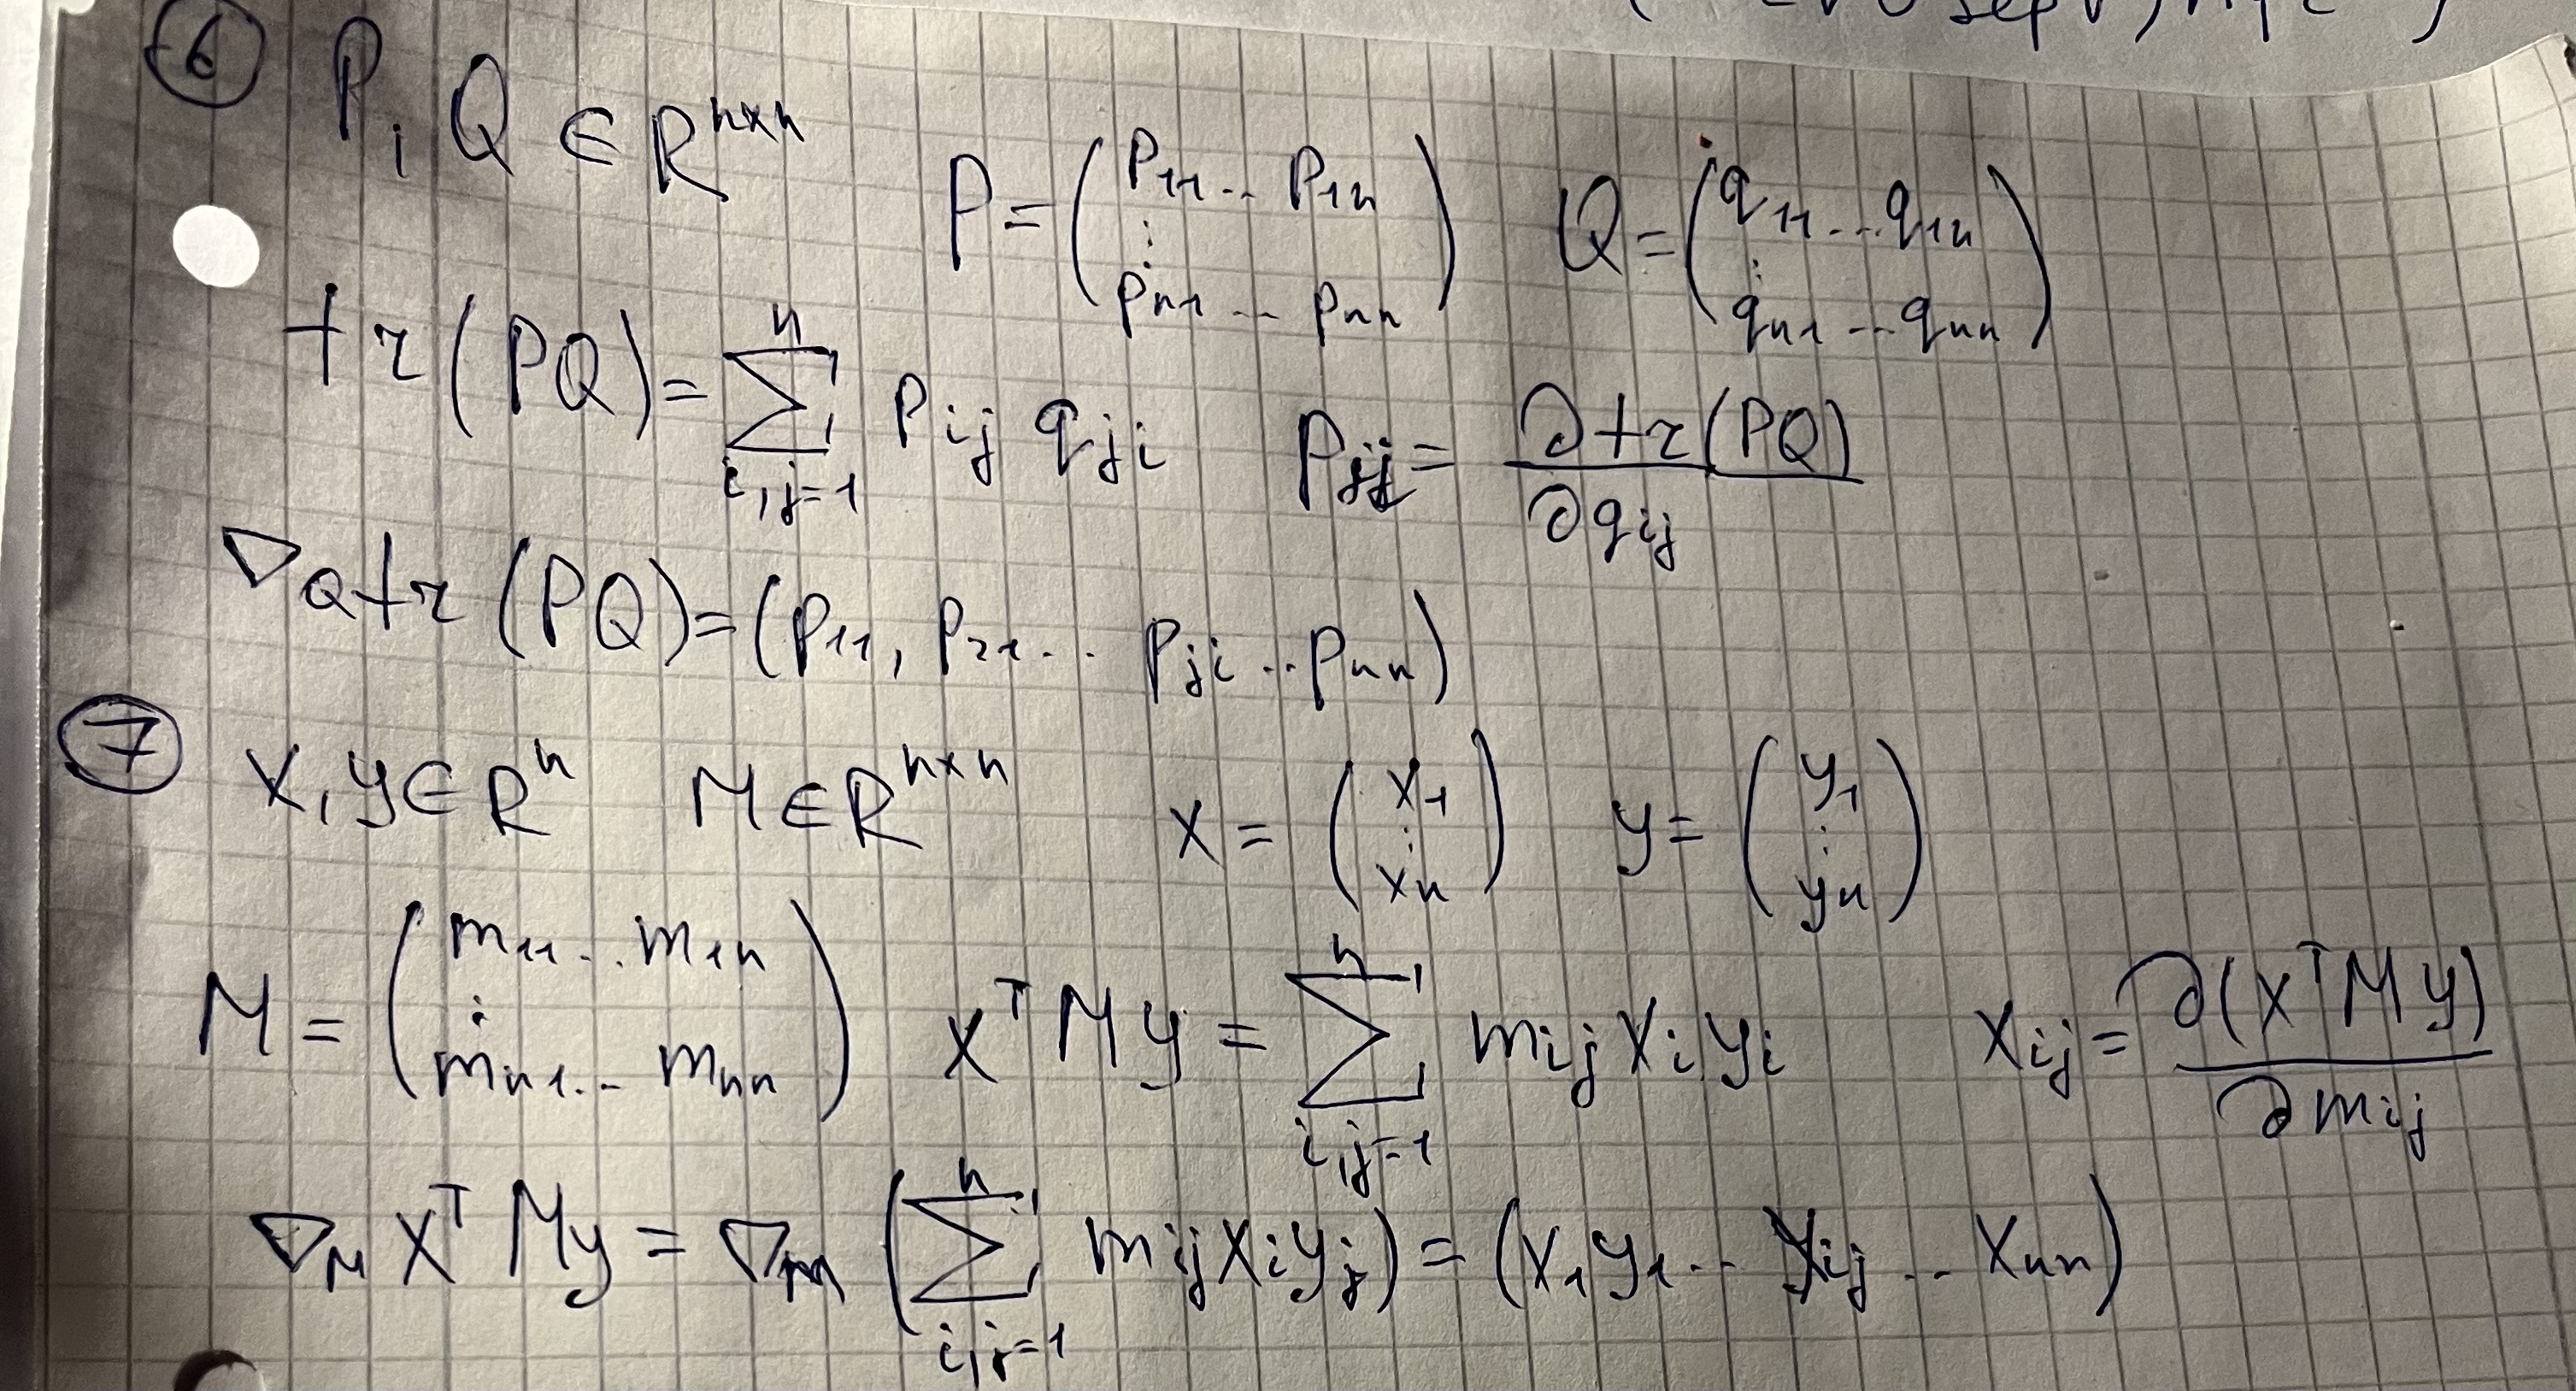